In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow import keras
import tensorflow as tf
import sklearn.metrics as skl

In [ ]:
dados=pd.read_csv(r"/content/dados_redes.csv")
isotermas=dados.Artigo.drop_duplicates().reset_index().Artigo


In [ ]:
ativacao=['linear',
          'relu',
          'sigmoid',
          'softsign',
          'tanh'
          ]


X_train=pd.read_excel(r"/content/iso_treino.xlsx")
X_test=pd.read_excel(r"/content/iso_teste.xlsx")
dados_train=dados[dados.Artigo.isin(X_train.Artigo)]
dados_test=dados[dados.Artigo.isin(X_test.Artigo)]

X_train=dados_train[['area','vol','T','Pressao']]
Y_train=dados_train['Adsorcao']
X_test=dados_test[['area','vol','T','Pressao']]
Y_test=dados_test['Adsorcao']
X_td=dados[['area','vol','T','Pressao']]
X_norm_train=MinMaxScaler().fit(X_td).transform(X_train)
X_norm_test=MinMaxScaler().fit(X_td).transform(X_test)

In [ ]:
def rede2(camadas,ep=200):



    cm1=int(camadas[0])
    #cm2=int(camadas[1])
    #cm3=int(camadas[2])
    ativ1=ativacao[int(camadas[1])]
    #ativ2=ativacao[int(camadas[3])]
    #ativ3=ativacao[int(camadas[5])]

    regressor = Sequential()
    regressor.add(tf.keras.Input(shape=(4,)))
    regressor.add(Dense(cm1,activation=ativ1))
    #regressor.add(Dense(cm2,activation=ativ2))
    #regressor.add(Dense(cm3,activation=ativ3))


    regressor.add(Dense(units=1,activation='relu'))

    #opt = keras.optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True)

    opt = keras.optimizers.Adam()
    regressor.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])
    model = regressor.fit(X_norm_train, Y_train,use_multiprocessing=True, epochs =ep,verbose=0)
    mae_test=skl.mean_absolute_error(Y_test,regressor.predict(X_norm_test))
    mae_train=skl.mean_absolute_error(Y_train,regressor.predict(X_norm_train))
   # print("REDE:" + str(cm1) +"-"+ativ1+"-"+ str(cm2)+"-"+ativ2)
    print(mae_test)
    print(mae_train)
    return regressor,model,[mae_test,mae_train,ep]


In [ ]:
params=[]
for i in range(5,200,5):
  regressor,model,parametros = rede2([30,1],ep=i)
  params.append(parametros)
  regressor.save('1cm-novo/model1cm-'+str(i)+'.h5')
  print(i)

213/213 [==============================] - 0s 1ms/step
2.544308635353749
1.9567726577605946
5
213/213 [==============================] - 0s 1ms/step
2.5044749414425316
1.9510696013424995
10
213/213 [==============================] - 0s 1ms/step
2.6127005050298227
1.8454463072546423
15
213/213 [==============================] - 0s 1ms/step
2.336991057124139
1.6459885596805142
20
213/213 [==============================] - 0s 1ms/step
2.4709319949677373
1.6721224399398975
25
213/213 [==============================] - 0s 1ms/step
2.460816543199583
1.6498535133942231
30
213/213 [==============================] - 0s 1ms/step
8.599875308231931
9.655205572089796
35
213/213 [==============================] - 0s 1ms/step
2.6242379116318424
1.7454293758243509
40
213/213 [==============================] - 0s 1ms/step
2.2989129092245792
1.4967149816901626
45
213/213 [==============================] - 0s 1ms/step
2.0744830615949925
1.4545617300976825
50
213/213 [==============================] - 0s 

KeyboardInterrupt: ignored

In [ ]:
#Salvando a performance treino x validação
pr=pd.DataFrame(params).rename(columns={0:'Teste',1:'Treino'})
pr.to_excel('1-camada-epochs-novo-v2.xlsx')

Analise com os dados reais


In [ ]:
from keras.saving.save import load_model
#modelo=load_model('/content/model1cm-145-v2.h5')


ModuleNotFoundError: ignored

In [ ]:
dados_reais=pd.read_excel("/content/dataset.xlsx")

In [ ]:
X=dados_reais[['area','vol','T','Pressão']].rename(columns={'Pressão':'Pressao'})
X_norm=MinMaxScaler().fit(X_td).transform(X)


In [ ]:
Y=modelo.predict(X_norm)
Previsao=pd.DataFrame(Y).to_excel('Previsão_dados_reais-1C.xlsx')

21/21 [==============================] - 0s 1ms/step


In [ ]:
X_norm=MinMaxScaler().fit(X_td).transform(X)

21/21 [==============================] - 0s 1ms/step


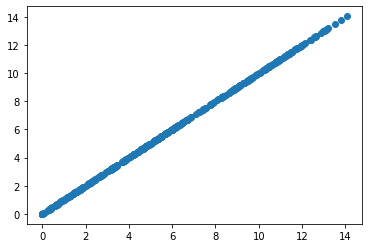

In [ ]:
Y_prev=modelo.predict(X_norm)
plt.scatter(Y,Y_prev)

In [ ]:
def graf(areaa):
  Pressao=np.arange(0.1,20,0.01)
  X_dados=pd.DataFrame(Pressao).rename(columns={0:'Pressao'})
  X_dados['vol']=X_td.vol.mean()
  X_dados['T']=X_td['T'].mean()
  X_dados['area']=areaa
  X_dados=X_dados[['area','vol','T','Pressao']]
  X_dados_norm=MinMaxScaler().fit(X_td).transform(X_dados)
  return [modelo.predict(X_dados_norm),X_dados.Pressao]

In [ ]:
def prev(areaa,Pressao):
  #Pressao=np.arange(0.1,20,0.01)
  X_dados=pd.DataFrame(Pressao).rename(columns={0:'Pressao'})
  X_dados['vol']=X_td.vol.mean()
  X_dados['T']=X_td['T'].mean()
  X_dados['area']=areaa
  X_dados=X_dados[['area','vol','T','Pressao']]
  X_dados_norm=MinMaxScaler().fit(X_td).transform(X_dados)
  return modelo.predict(X_dados_norm)

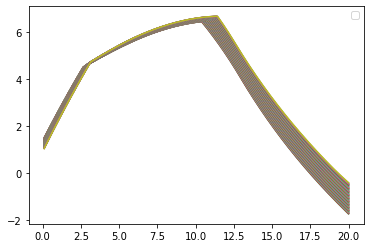

In [ ]:
for i in range(1,100):
  plt.plot(graf(800+i*1)[1],graf(800+i*1)[0])
plt.legend()

Geração Gráfico Parametrico


In [ ]:
from keras.saving.save import load_model
modelo=load_model('/content/model1cm-145-v2.h5')
#modelo.predict()

In [ ]:
def prev(areaa,Pressao):
  #Pressao=np.arange(0.1,20,0.01)
  X_dados=pd.DataFrame(Pressao).rename(columns={0:'Pressao'})
  X_dados['vol']=X_td.vol.mean()
  #X_dados['T']=X_td['T'].mean()
  #X_dados['vol']=0.1
  X_dados['T']=314
  X_dados['area']=areaa
  X_dados=X_dados[['area','vol','T','Pressao']]
  X_dados_norm=MinMaxScaler().fit(X_td).transform(X_dados)
  return modelo.predict(X_dados_norm)



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc







94/94 [==============================] - 0s 1ms/step


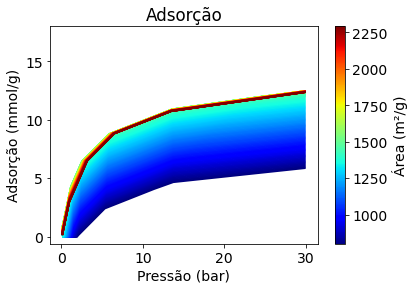

<Figure size 10800x10800 with 0 Axes>

In [ ]:
n_lines = 150
Pressao=np.arange(0.1,30,0.01)

yint = np.arange(800,800+ n_lines*10, 10)

xs = np.array([Pressao for i in range(n_lines)])
ys=()
for i in range(n_lines):
  ys=np.append(ys,prev(800+i*10,Pressao))
colors = np.arange(n_lines)

ys=ys.reshape(n_lines,xs.shape[1])
fig, ax = plt.subplots()
lc = multiline(xs, ys, yint, cmap='jet', lw=2)

axcb = fig.colorbar(lc)
axcb.set_label('Área (m\u00b2/g)')
ax.set_title('Adsorção')
plt.ylabel('Adsorção (mmol/g)')
plt.xlabel('Pressão (bar)')
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 14})
#plt.figure(figsize=(150, 150))
plt.ylim(top=18)
plt.figure(figsize=(150, 150))
fig.savefig('Temp_Média.png')


In [ ]:
def prev(vol,Pressao):
  #Pressao=np.arange(0.1,20,0.01)
  X_dados=pd.DataFrame(Pressao).rename(columns={0:'Pressao'})
  X_dados['vol']=vol
  #X_dados['T']=X_td['T'].mean()
  #X_dados['vol']=0.1
  X_dados['T']=306
  #X_dados['area']=X_td.area.mean()
  X_dados['area']=2000
  X_dados=X_dados[['area','vol','T','Pressao']]
  X_dados_norm=MinMaxScaler().fit(X_td).transform(X_dados)
  return modelo.predict(X_dados_norm)



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

94/94 [==============================] - 0s 1ms/step


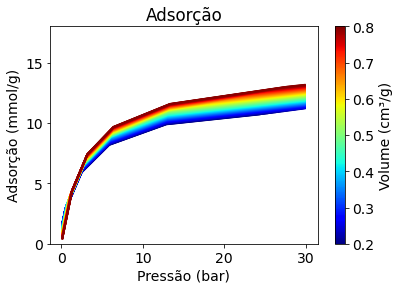

<Figure size 10800x10800 with 0 Axes>

In [ ]:
n_lines = 120
Pressao=np.arange(0.1,30,0.01)

yint = np.arange(0.2,0.2+ n_lines*0.005, 0.005)

xs = np.array([Pressao for i in range(n_lines)])
ys=()
for i in range(n_lines):
  ys=np.append(ys,prev(0.2+i*0.005,Pressao))
colors = np.arange(n_lines)

ys=ys.reshape(n_lines,xs.shape[1])
fig, ax = plt.subplots()
lc = multiline(xs, ys, yint, cmap='jet', lw=2)

axcb = fig.colorbar(lc)
axcb.set_label('Volume (cm\u00b3/g)')
ax.set_title('Adsorção')
plt.ylabel('Adsorção (mmol/g)')
plt.xlabel('Pressão (bar)')
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 14})
#plt.figure(figsize=(150, 150))
plt.ylim(0,18)
plt.figure(figsize=(150, 150))
fig.savefig('Temp_Média.png')


In [ ]:
lista=[1,2,3,4,8]

In [ ]:
if len(lista)%2==0:
  print(lista[0])
else:
  print(lista[-1])

8


In [ ]:
from keras.saving.save import load_model

ModuleNotFoundError: ignored

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/bp_model1cm.h5')

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model,"/content/")